In [ ]:

# Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, Bidirectional
from keras.layers import Dropout
from keras.layers import Flatten, TimeDistributed, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras import metrics
from keras import backend
from numpy import argmax
from numpy import asarray
from pylab import rcParams
from sklearn.metrics import confusion_matrix
rcParams['figure.figsize'] = 15, 10

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis = -1))

def sensitivity(y_true, y_pred):  
     y_pred_pos = backend.round(backend.clip(y_pred, 0, 1))
     y_pred_neg = 1 - y_pred_pos
     y_pos = backend.round(backend.clip(y_true, 0, 1))
     y_neg = 1 - y_pos
     tp = backend.sum(y_pos * y_pred_pos)
     tn = backend.sum(y_neg * y_pred_neg)
     fp = backend.sum(y_neg * y_pred_pos)
     fn = backend.sum(y_pos * y_pred_neg)
     sensitivity = tp / (tp + fn)
     return sensitivity

# Recall is the same as the sensitivity
def recall(y_true, y_pred):  
     y_pred_pos = backend.round(backend.clip(y_pred, 0, 1))
     y_pred_neg = 1 - y_pred_pos
     y_pos = backend.round(backend.clip(y_true, 0, 1))
     y_neg = 1 - y_pos
     tp = backend.sum(y_pos * y_pred_pos)
     tn = backend.sum(y_neg * y_pred_neg)
     fp = backend.sum(y_neg * y_pred_pos)
     fn = backend.sum(y_pos * y_pred_neg)
     recall = tp / (tp + fn)
     return recall

def specificity(y_true, y_pred):  
     y_pred_pos = backend.round(backend.clip(y_pred, 0, 1))
     y_pred_neg = 1 - y_pred_pos
     y_pos = backend.round(backend.clip(y_true, 0, 1))
     y_neg = 1 - y_pos
     tp = backend.sum(y_pos * y_pred_pos)
     tn = backend.sum(y_neg * y_pred_neg)
     fp = backend.sum(y_neg * y_pred_pos)
     fn = backend.sum(y_pos * y_pred_neg)
     specificity = tn / (tn + fp)
     return specificity


def precision(y_true, y_pred):  
     y_pred_pos = backend.round(backend.clip(y_pred, 0, 1))
     y_pred_neg = 1 - y_pred_pos
     y_pos = backend.round(backend.clip(y_true, 0, 1))
     y_neg = 1 - y_pos
     tp = backend.sum(y_pos * y_pred_pos)
     tn = backend.sum(y_neg * y_pred_neg)
     fp = backend.sum(y_neg * y_pred_pos)
     fn = backend.sum(y_pos * y_pred_neg)
     precision = tp / (tp + fp)
     return precision


In [ ]:
df=pd.read_csv("/content/drive/My Drive/mtech_finalyr_project/modified_Dataset/final_csv_with_shuffle.csv")
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096,tag
0,0,-18.0,-55.0,-126.0,-202.0,-238.0,-226.0,-171.0,-111.0,-73.0,-48.0,-45.0,-53.0,-95.0,-165.0,-243.0,-288.0,-309.0,-237.0,-95.0,163.0,528.0,899.0,1179.0,1316.0,1283.0,1132.0,907.0,672.0,338.0,-112.0,-340.0,-430.0,-38.0,293.0,379.0,178.0,-148.0,-375.0,-415.0,...,180.0,-125.0,48.0,204.0,747.0,1153.0,1183.0,949.0,534.0,153.0,-83.0,-168.0,-208.0,-250.0,-246.0,-235.0,-224.0,-244.0,-275.0,-305.0,-334.0,-368.0,-394.0,-406.0,-398.0,-361.0,-309.0,-225.0,-129.0,-59.0,-48.0,-94.0,-161.0,-210.0,-222.0,-224.0,-200.0,-127.0,-226.0,5
1,1,-26.0,1.0,29.0,41.0,33.0,2.0,-31.0,-60.0,-81.0,-99.0,-117.0,-140.0,-168.0,-200.0,-242.0,-280.0,-313.0,-339.0,-350.0,-345.0,-323.0,-292.0,-271.0,-269.0,-292.0,-354.0,-487.0,-682.0,-747.0,-635.0,-330.0,5.0,208.0,313.0,335.0,348.0,358.0,423.0,474.0,...,-423.0,-366.0,-229.0,-79.0,40.0,126.0,195.0,242.0,307.0,395.0,504.0,592.0,656.0,696.0,701.0,659.0,545.0,368.0,196.0,80.0,48.0,73.0,93.0,75.0,5.0,-101.0,-204.0,-279.0,-308.0,-288.0,-254.0,-220.0,-200.0,-201.0,-205.0,-209.0,-207.0,-210.0,-107.0,5
2,2,68.0,-106.0,-149.0,-141.0,-109.0,-69.0,-74.0,-93.0,-110.0,-103.0,-89.0,-72.0,-42.0,-18.0,5.0,24.0,50.0,74.0,93.0,110.0,118.0,120.0,118.0,118.0,114.0,108.0,100.0,88.0,71.0,57.0,39.0,20.0,7.0,10.0,40.0,95.0,173.0,240.0,239.0,...,244.0,364.0,262.0,-6.0,-319.0,-509.0,-501.0,-350.0,-150.0,-8.0,7.0,-30.0,-108.0,-183.0,-221.0,-182.0,-92.0,49.0,208.0,299.0,330.0,284.0,203.0,135.0,81.0,57.0,72.0,105.0,146.0,196.0,260.0,367.0,493.0,566.0,554.0,460.0,343.0,247.0,-468.0,5
3,3,343.0,311.0,284.0,274.0,260.0,237.0,165.0,-33.0,-271.0,-425.0,-418.0,-254.0,-104.0,-14.0,16.0,24.0,23.0,11.0,4.0,20.0,40.0,67.0,99.0,127.0,130.0,126.0,133.0,124.0,108.0,54.0,-5.0,-45.0,-61.0,-65.0,-52.0,-46.0,-25.0,-15.0,-4.0,...,-70.0,-118.0,-155.0,-201.0,-283.0,-368.0,-363.0,-333.0,-271.0,-203.0,-126.0,-31.0,48.0,86.0,102.0,124.0,125.0,132.0,144.0,187.0,263.0,343.0,411.0,433.0,417.0,397.0,395.0,414.0,435.0,439.0,428.0,423.0,430.0,472.0,515.0,527.0,480.0,397.0,217.0,5
4,4,-63.0,-107.0,-208.0,-310.0,-395.0,-491.0,-463.0,-426.0,-275.0,-114.0,34.0,142.0,191.0,183.0,141.0,103.0,76.0,66.0,74.0,95.0,110.0,127.0,136.0,141.0,141.0,137.0,118.0,89.0,42.0,6.0,-33.0,-52.0,-49.0,-31.0,-5.0,23.0,40.0,47.0,45.0,...,-588.0,-534.0,-475.0,-405.0,-330.0,-281.0,-269.0,-296.0,-358.0,-393.0,-363.0,-251.0,-131.0,-57.0,-81.0,-156.0,-239.0,-318.0,-396.0,-372.0,-270.0,-71.0,66.0,75.0,7.0,-84.0,-148.0,-187.0,-263.0,-367.0,-495.0,-517.0,-432.0,-234.0,-32.0,56.0,44.0,-37.0,28.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,213.0,210.0,210.0,212.0,194.0,162.0,121.0,84.0,45.0,11.0,-13.0,-20.0,-27.0,-32.0,-31.0,-39.0,-49.0,-61.0,-72.0,-80.0,-85.0,-87.0,-93.0,-96.0,-97.0,-94.0,-82.0,-57.0,-18.0,-3.0,-11.0,-1.0,41.0,120.0,181.0,202.0,198.0,195.0,197.0,...,-108.0,-112.0,-113.0,-112.0,-103.0,-100.0,-98.0,-95.0,-94.0,-92.0,-91.0,-89.0,-86.0,-84.0,-78.0,-70.0,-63.0,-53.0,-46.0,-37.0,-34.0,-29.0,-28.0,-23.0,-15.0,-13.0,-14.0,-9.0,-10.0,-5.0,-2.0,1.0,1.0,-2.0,-8.0,-9.0,-2.0,20.0,-231.0,5
496,496,24.0,10.0,-9.0,-18.0,-9.0,-3.0,-2.0,-2.0,-9.0,-9.0,-14.0,-14.0,-24.0,-24.0,-12.0,-1.0,13.0,31.0,60.0,79.0,98.0,110.0,104.0,72.0,40.0,26.0,24.0,33.0,40.0,29.0,13.0,3.0,2.0,0.0,10.0,32.0,52.0,61.0,54.0,...,55.0,33.0,15.0,-5.0,-18.0,-24.0,-28.0,-15.0,12.0,33.0,48.0,47.0,36.0,19.0,16.0,31.0,56.0,69.0,75.0,67.0,66.0,76.0,93.0,88.0,65.0,56.0,58.0,63.0,48.0,29.0,3.0,-17.0,-14.0,-21.0,-29.0,-39.0,-33.0,-28.0,-1

In [ ]:
df.tag=df.tag.replace({1:0,2:1,3:2,5:4 , 4:3 })
df=df.drop(['Unnamed: 0'], axis = 1)
df=df.drop(['4096'], axis = 1)
df["tag"].value_counts()

4    100
3    100
2    100
1    100
0    100
Name: tag, dtype: int64

In [ ]:
# Time Steps of LSTM
data_length = 4096
timesteps = 2048
data_dim = data_length//timesteps
data_dim


#breaking dataset into X nd y
df1=df.values     #df1 is numpy.ndarray and df is pandas.dataframe
X, y = df1[:, :-1], df1[:, -1]
print(df.shape)
print("shape of X",X.shape)
print("shape of y",y.shape)


#breaking X nd y into train nd test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

print("\nshape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

X_train=X_train.reshape([X_train.shape[0], timesteps, data_dim])
X_test = X_test.reshape([X_test.shape[0], timesteps, data_dim])
y_train=np_utils.to_categorical(y_train, num_classes=5)
y_test=np_utils.to_categorical(y_test, num_classes=5)



print("\nshape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

(500, 4097)
shape of X (500, 4096)
shape of y (500,)

shape of X_train (350, 4096)
shape of X_test (150, 4096)
shape of y_train (350,)
shape of y_test (150,)

shape of X_train (350, 2048, 2)
shape of X_test (150, 2048, 2)
shape of y_train (350, 5)
shape of y_test (150, 5)


Epoch 1/100
6/6 [==============================] - 38s 823ms/step - loss: 1.5958 - sensitivity: 0.0000e+00 - specificity: 1.0000 - accuracy: 0.2421 - val_loss: 1.4112 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000 - val_accuracy: 0.5800
Epoch 2/100
6/6 [==============================] - 3s 580ms/step - loss: 1.4061 - sensitivity: 0.0000e+00 - specificity: 1.0000 - accuracy: 0.4925 - val_loss: 1.2900 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000 - val_accuracy: 0.5867
Epoch 3/100
6/6 [==============================] - 3s 580ms/step - loss: 1.2702 - sensitivity: 0.0250 - specificity: 1.0000 - accuracy: 0.6460 - val_loss: 1.1729 - val_sensitivity: 0.1136 - val_specificity: 0.9987 - val_accuracy: 0.6533
Epoch 4/100
6/6 [==============================] - 3s 577ms/step - loss: 1.1697 - sensitivity: 0.1369 - specificity: 1.0000 - accuracy: 0.6318 - val_loss: 1.0690 - val_sensitivity: 0.1449 - val_specificity: 0.9987 - val_accuracy: 0.6200
Epoch 5/100
6/6 [==================

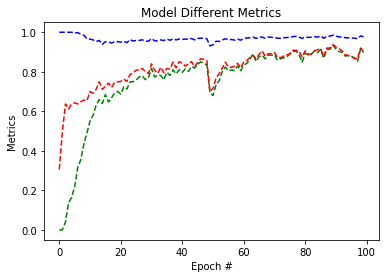

Sensitivity = 76.99%
Specificity = 94.25%
Classification Accuracy = 76.67%


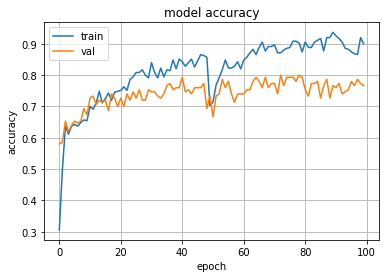

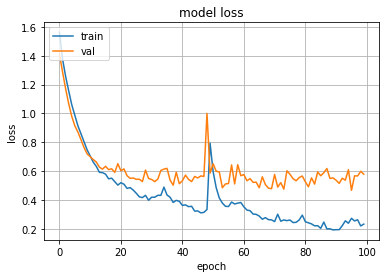

In [ ]:
nb_epoch=100

model = Sequential()

model.add(Bidirectional(LSTM(80, input_shape= (timesteps, data_dim), return_sequences = True)))
model.add(Dropout(0.1))

model.add(TimeDistributed(Dense(50)))

model.add(GlobalAveragePooling1D())

model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[sensitivity, specificity, 'accuracy'])
#print(model.summary())
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=nb_epoch)


plt.plot(history.history['specificity'], 'b--')
plt.plot(history.history['sensitivity'], 'g--')
plt.plot(history.history['accuracy'], 'r--')
plt.title('Model Different Metrics')
plt.ylabel('Metrics')
plt.xlabel('Epoch #')
plt.show()



scores = model.evaluate(X_test, y_test, verbose=0)
print("Sensitivity = %.2f%%" % (scores[1]*100))
print("Specificity = %.2f%%" % (scores[2]*100))
print("Classification Accuracy = %.2f%%" % (scores[3]*100))


%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
#check output of model
y_predict=model.predict(X_test)

# define vector
probs = asarray(y_predict)
print(probs.shape)
# get argmax
result = argmax(probs, axis=1)
print(result)

y_test_cm=argmax(y_test,axis=1)
print(result.shape)



confusion = confusion_matrix(y_test_cm, result)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test_cm, result)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test_cm, result, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test_cm, result, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test_cm, result, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test_cm, result, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test_cm, result, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test_cm, result, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test_cm, result, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test_cm, result, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_cm, result, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test_cm, result, target_names=['Class A','Class B','Class C','Class D', 'Class E']))

(150, 5)
[3 1 0 4 0 4 4 2 3 4 2 0 4 0 4 2 3 2 3 1 3 3 1 3 0 1 3 4 2 0 4 1 0 1 3 4 0
 2 3 3 3 1 4 3 1 1 3 1 3 3 1 4 4 1 3 2 1 1 3 0 3 4 4 2 3 0 0 2 4 2 0 1 1 3
 1 3 4 1 3 0 3 4 1 2 4 4 1 1 3 4 2 4 3 1 4 0 3 4 1 2 1 4 2 4 2 1 2 3 3 4 4
 1 1 1 0 0 1 0 0 2 2 2 2 3 1 4 0 2 0 1 3 4 0 4 1 2 3 0 1 3 0 2 2 4 0 2 3 0
 2 1]
(150,)
Confusion Matrix

[[21  6  0  3  0]
 [ 4 25  0  1  0]
 [ 0  3 18  9  0]
 [ 0  0  8 21  1]
 [ 0  0  0  0 30]]

Accuracy: 0.77

Micro Precision: 0.77
Micro Recall: 0.77
Micro F1-score: 0.77

Macro Precision: 0.77
Macro Recall: 0.77
Macro F1-score: 0.77

Weighted Precision: 0.77
Weighted Recall: 0.77
Weighted F1-score: 0.77

Classification Report

              precision    recall  f1-score   support

     Class A       0.84      0.70      0.76        30
     Class B       0.74      0.83      0.78        30
     Class C       0.69      0.60      0.64        30
     Class D       0.62      0.70      0.66        30
     Class E       0.97      1.00      0.98        30

    a

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/mtech_finalyr_project/5 class problem/model_5class_AvsCvsDvsBvsE.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/mtech_finalyr_project/5 class problem/model_5class_AvsCvsDvsBvsE.h5")
print("Saved model to disk")
 

Saved model to disk


In [ ]:
  """
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
"""